## Problem 2

In [81]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.signal import welch
from scipy.signal import spectrogram
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from scipy.signal import square
import numpy as np
from getrpm import getrpm,maketime
from Fast_Kurtogram_Python import Fast_Kurtogram,Feature,max_IJ,K_wpQ,K_wpQ_local,DBFB,TBFB
import scipy.io
import sympy as sp
from scipy import signal
import scipy.signal as Sig
from scipy import integrate

In [1]:
import phenomenological_model as PMF
import numpy as np
import scipy.integrate as integrate
import scipy.signal as sigs
from matplotlib import pyplot as plt
import scipy.io as IO
from scipy.interpolate import interp1d
import Fast_Kurtogram_Python as kurt
from getrpm import maketime,getrpm

from scipy.io import loadmat
Record1 = loadmat('MEV_A2_2021_Record1.mat')
Record2 = loadmat('MEV_A2_2021_Record2.mat')

In [72]:

def RMS(Signal, Time):
    """
    Calculates the RMS of a given signal to show the SNR of the different components
    """
    T = Time[-1]
    RMS_Val = np.sqrt((1/T) * Int.simps(Signal**2, Time))
    return RMS_Val

def nextpow2(x):
    res = np.ceil(np.log2(x))
    return res.astype('int')

def fft(x, Fs):
    Signal = x # Define Signal of Interest
    Fs = Fs # Fs = Fs unless otherwise specified
    n = len(Signal)
    FFT_Freq = np.fft.fftfreq(n, 1/Fs)
    FFT_Freq = FFT_Freq[0:int(n/2)]
    FFT_Vals = np.fft.fft(Signal)/n
    FFT_ValsPlot = np.abs(FFT_Vals)
    FFT_ValsPlot[:int(n/2)] = 2 * FFT_ValsPlot[:int(n/2)]
    xf = FFT_Freq # x- axis of frequency spectrum
    yf = FFT_ValsPlot[0:int(n/2)] # y- axis of frequency spectrum

    return xf, yf

def make_tacho(Fs, Signal):
    """
    Part of this code was adapted from Heiko Dieter Kabutz 's MEV Assignment 1
    """
    T = 1/Fs
    speed = Signal/10
    ticks = 20/2
    circ = np.pi * (0.4683)
    speedrev = speed/circ
    speedtick = speedrev * ticks
    speedtick = speedtick * T
    tickpass = np.cumsum(speedtick)
    P = 1
    D = P/2
    tacho = tickpass%P<D
    return tacho

In [3]:
X_gear = Record1['X_gear'][0]
X_noise = Record1['X_noise'][0]
X_bearing = Record1['X_bearing'][0]
X_measured = X_gear + X_noise + X_bearing
Fs = Record1['Fs'][0]
print(Record1['X_noise'])
print(Record1['X_bearing'])
print(Record1['Fs'])
print(Record1['Tacho_input_shaft'])
print(Record1['PPR_input_shaft'])
t0 = 0
t1 = 10
Time = np.linspace(t0, t1, int(t1*Fs))

[[-0.04622669  0.56789115  0.00965087 ...  0.15243623  0.08794237
   0.14067798]]
[[-0.00325355 -0.00325355 -0.00325355 ... -0.00325462 -0.00325548
  -0.00325302]]
[[30000]]
[[0. 0. 0. ... 0. 0. 0.]]
[[20]]


### a.1) Calculate speed of the input and output shafts

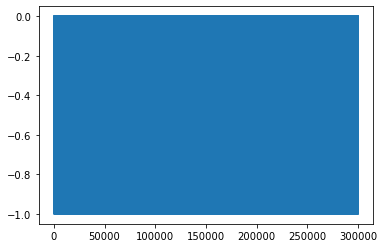

[0.00000000e+00 1.00009668e-03 2.00019335e-03 ... 9.99796647e+00
 9.99896657e+00 9.99996667e+00]


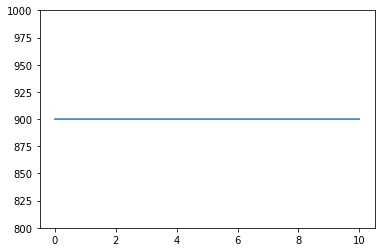

15.0
30.0


In [5]:
tacho = Record1['Tacho_input_shaft'][0]
plt.plot(tacho);plt.show()
ppr = Record1['PPR_input_shaft'][0][0]
Fs = Record1['Fs'][0][0]
trpm,rpm = getrpm(tacho,Fs,-1,-1,ppr,1000)
print(trpm)
plt.plot(trpm,rpm)
plt.ylim(800,1000)

plt.show()

Fr_in = 900/60 # RPM
Fr_out = 2*900/60 # RPM

print(Fr_in)
print(Fr_out)

### a.2) Characteristic frequencies for both bearnings

In [6]:
n = 13 # Number of roller elements 
d = 4 # Roller diameter (mm)
D = 40 # Pitch diameter (mm)
phi = 4*np.pi/180 # Contact angle (degrees)
N = 30 # Number of gear teeth 

BFRO1 = (n*Fr_in/2)*(1-(d/D)*np.cos(phi))
BFFI1 = (n*Fr_in/2)*(1+(d/D)*np.cos(phi))
FTF1 = (Fr_in/2)*(1-(d/D)*np.cos(phi))
BSF1 = Fr_in*(D/(2*d))*(1-((d/D)*np.cos(phi))**2)
GMF1 = (N*Fr_in)

print('Gear Shaft Bearing','Hz')
print('BFRO:',BFRO1,'Hz')
print('BFFI:',BFFI1,'Hz')
print('FTF:',FTF1,'Hz')
print('BSF:',BSF1,'Hz')
print('GMF:',GMF1,'Hz')

N = 15 # Number of gear teeth 

BFRO2 = (n*Fr_out/2)*(1-(d/D)*np.cos(phi))
BFFI2 = (n*Fr_out/2)*(1+(d/D)*np.cos(phi))
FTF2 = (Fr_out/2)*(1-(d/D)*np.cos(phi))
BSF2 = Fr_out*(D/(2*d))*(1-((d/D)*np.cos(phi))**2)
GMF2 = (N*Fr_out)

print('\nPinion Shaft Bearing')
print('BFRO:',BFRO2,'Hz')
print('BFFI:',BFFI2,'Hz')
print('FTF:',FTF2,'Hz')
print('BSF:',BSF2,'Hz')
print('GMF:',GMF2,'Hz')

Gear Shaft Bearing Hz
BFRO: 87.7737505099667 Hz
BFFI: 107.2262494900333 Hz
FTF: 6.751826962305131 Hz
BSF: 74.25364947422192 Hz
GMF: 450.0 Hz

Pinion Shaft Bearing
BFRO: 175.5475010199334 Hz
BFFI: 214.4524989800666 Hz
FTF: 13.503653924610262 Hz
BSF: 148.50729894844383 Hz
GMF: 450.0 Hz


### b) Visualise the signals in time-domain and frequency domain
### Record 1

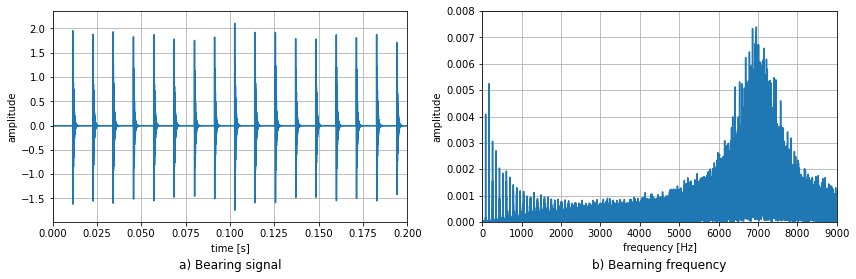

In [114]:
X_gear = Record1['X_gear'][0]
X_noise = Record1['X_noise'][0]
X_bearing = Record1['X_bearing'][0]
X_measured = X_gear + X_noise + X_bearing
Fs = Record1['Fs'][0]
Tend = 10
t = np.arange(0, Tend, 1/30000)

fig, axs = plt.subplots(1, 2,figsize=(12,4))

j = 0

axs[0].plot(t,X_bearing)
axs[0].set_xlim(0,0.2)
axs[0].set_xlabel('time [s]')
axs[0].set_ylabel('amplitude')
axs[0].set_title('a) Bearing signal', y=-0.25)
axs[0].grid()
xf,yf = fft(X_bearing, Fs)
axs[1].plot(xf,yf)
axs[1].set_ylim(0,0.008)
axs[1].set_xlabel('frequency [Hz]')
axs[1].set_ylabel('amplitude')
axs[1].grid()
axs[1].set_title('b) Bearning frequency', y=-0.25)
axs[1].set_xlim(0,9000)
plt.tight_layout()
plt.savefig('bearing1.png',dpi=300)
plt.show()

No handles with labels found to put in legend.


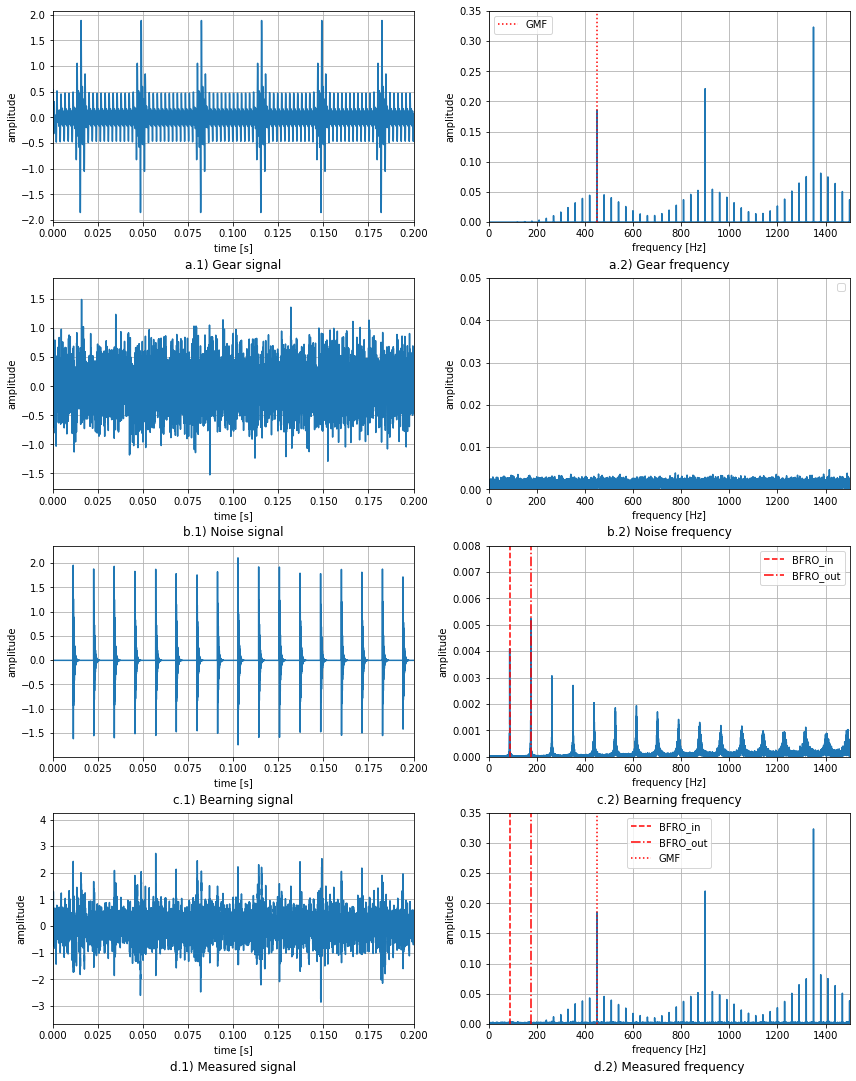

In [115]:
X_gear = Record1['X_gear'][0]
X_noise = Record1['X_noise'][0]
X_bearing = Record1['X_bearing'][0]
X_measured = X_gear + X_noise + X_bearing
Fs = Record1['Fs'][0]
Tend = 10
t = np.arange(0, Tend, 1/30000)

fig, axs = plt.subplots(4, 2,figsize=(12,15))
labels = ['a.1) Gear signal','b.1) Noise signal','c.1) Bearning signal','d.1) Measured signal',]
labels2 = ['a.2) Gear frequency','b.2) Noise frequency','c.2) Bearning frequency','d.2) Measured frequency',]

for i,j,lim,label,label2 in zip([X_gear,X_noise,X_bearing,X_measured],range(4),[0.35,0.05,0.008,0.35],labels,labels2):
    axs[j,0].plot(t,i)
    axs[j,0].set_xlim(0,0.2)
    axs[j,0].set_xlabel('time [s]')
    axs[j,0].set_ylabel('amplitude')
    axs[j,0].set_title(label, y=-0.25)
    axs[j,0].grid()
    xf,yf = fft(i, Fs)
    axs[j,1].plot(xf,yf)
    if j == 2 or j ==3:
        axs[j,1].plot([BFRO1,BFRO1],[0,0.35],'r--',label = 'BFRO_in')
        axs[j,1].plot([BFRO2,BFRO2],[0,0.35],'r-.',label = 'BFRO_out')
    if j == 0 or j == 3:
        axs[j,1].plot([GMF1,GMF1],[0,0.35],'r:',label = 'GMF')
    axs[j,1].set_ylim(0,lim)
    axs[j,1].set_xlabel('frequency [Hz]')
    axs[j,1].set_ylabel('amplitude')
    axs[j,1].grid()
    axs[j,1].set_title(label2, y=-0.25)
    axs[j,1].set_xlim(0,1500)
    axs[j,1].legend()
plt.tight_layout()
plt.savefig('record1_freq.png',dpi=300)
plt.show()

### Record 2

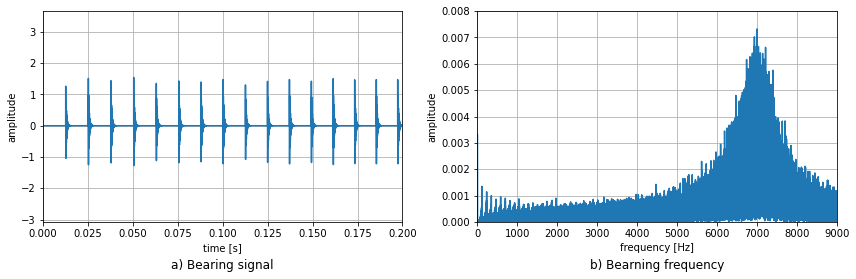

In [116]:
X_gear = Record2['X_gear'][0]
X_noise = Record2['X_noise'][0]
X_bearing = Record2['X_bearing'][0]
X_measured = X_gear + X_noise + X_bearing
Fs = Record1['Fs'][0]
Tend = 10
t = np.arange(0, Tend, 1/30000)

fig, axs = plt.subplots(1, 2,figsize=(12,4))

j = 0

axs[0].plot(t,X_bearing)
axs[0].set_xlim(0,0.2)
axs[0].set_xlabel('time [s]')
axs[0].set_ylabel('amplitude')
axs[0].set_title('a) Bearing signal', y=-0.25)
axs[0].grid()
xf,yf = fft(X_bearing, Fs)
axs[1].plot(xf,yf)
axs[1].set_ylim(0,0.008)
axs[1].set_xlabel('frequency [Hz]')
axs[1].set_ylabel('amplitude')
axs[1].grid()
axs[1].set_title('b) Bearning frequency', y=-0.25)
axs[1].set_xlim(0,9000)
plt.tight_layout()
plt.savefig('bearing2.png',dpi=300)
plt.show()

No handles with labels found to put in legend.


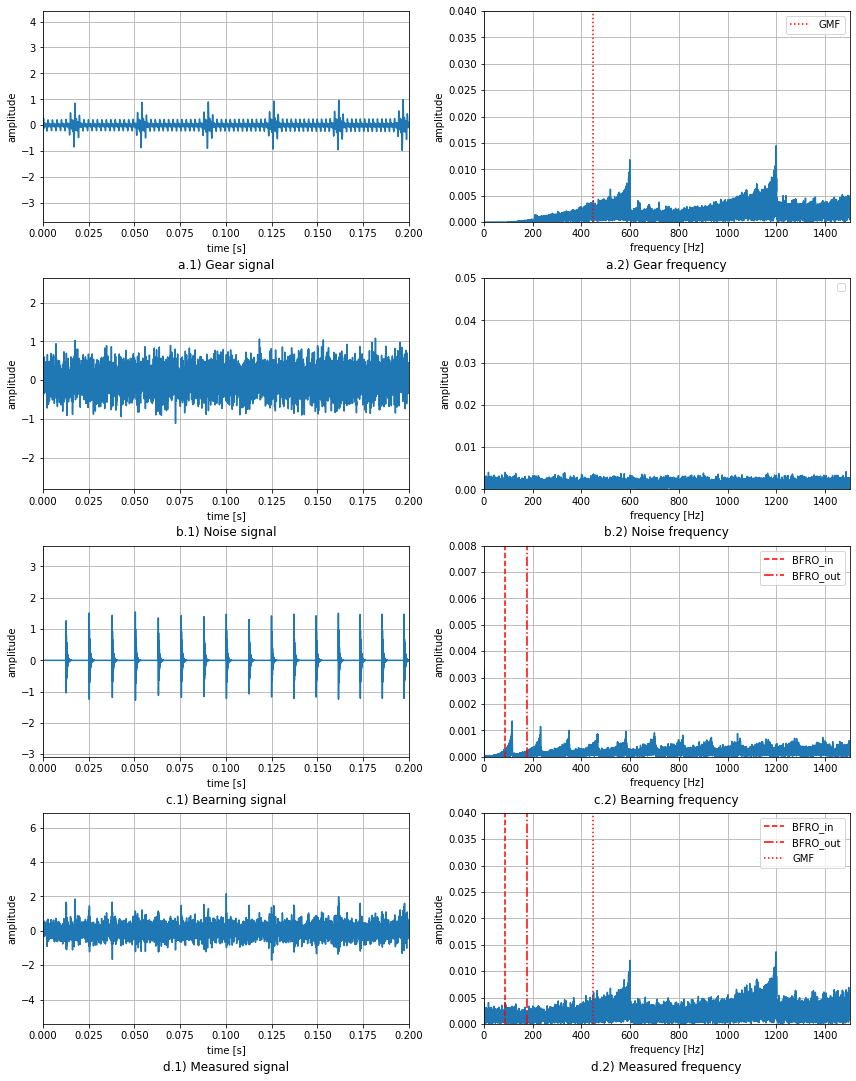

In [117]:
X_gear = Record2['X_gear'][0]
X_noise = Record2['X_noise'][0]
X_bearing = Record2['X_bearing'][0]
X_measured = X_gear + X_noise + X_bearing
labels = ['X_gear','X_noise','X_bearing','X_measured']
Fs = Record2['Fs'][0]
Tend = 10
t = np.arange(0, Tend, 1/30000)

fig, axs = plt.subplots(4, 2,figsize=(12,15))
labels1 = ['a.1) Gear signal','b.1) Noise signal','c.1) Bearning signal','d.1) Measured signal',]
labels2 = ['a.2) Gear frequency','b.2) Noise frequency','c.2) Bearning frequency','d.2) Measured frequency',]

for i,j,lim,label,label2 in zip([X_gear,X_noise,X_bearing,X_measured],range(4),[0.04,0.05,0.008,0.04],labels1,labels2):
    axs[j,0].plot(t,i)
    axs[j,0].set_xlim(0,0.2)
    axs[j,0].set_xlabel('time [s]')
    axs[j,0].set_ylabel('amplitude')
    axs[j,0].grid()
    axs[j,0].set_title(label, y=-0.25)
    xf,yf = fft(i, Fs)
    axs[j,1].plot(xf,yf)
    if j == 2 or j ==3:
        axs[j,1].plot([BFRO1,BFRO1],[0,0.35],'r--',label = 'BFRO_in')
        axs[j,1].plot([BFRO2,BFRO2],[0,0.35],'r-.',label = 'BFRO_out')
    if j == 0 or j == 3:
        axs[j,1].plot([GMF1,GMF1],[0,0.35],'r:',label = 'GMF')
    axs[j,1].set_ylim(0,lim)
    axs[j,1].set_xlabel('frequency [Hz]')
    axs[j,1].set_ylabel('amplitude')
    axs[j,1].grid()
    axs[j,1].set_title(label2, y=-0.25)
    axs[j,1].set_xlim(0,1500)
    axs[j,1].legend()
plt.tight_layout()
plt.savefig('record2_freq.png',dpi=300)
plt.show()

### Operating conditons

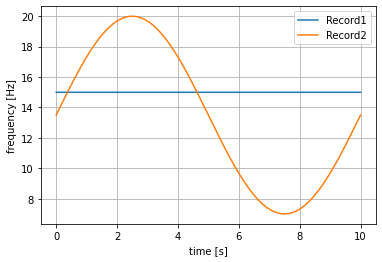

In [118]:
shaft_speed = 6.5 * np.sin(0.2 * np.pi * t) + 13.5
plt.plot(t,np.linspace(15,15,len(t)),label='Record1')
plt.plot(t,shaft_speed,label='Record2')
plt.xlabel('time [s]')
plt.ylabel('frequency [Hz]')
plt.legend()
plt.grid()
plt.savefig('operate.png',dpi=300)
plt.show()

### c) Synchronous average

In [102]:
def synchronous(tacho, triglevel, data, t, slope,ppr):
    ind = np.where(np.diff(np.sign(tacho - triglevel)))[0]
    #ind = np.array(ind)*ppr
    time_frame = []
    for i in range(len(ind)-2):
        time_frame.append(ind[i+2]-ind[i])
    time_frame = int(round(np.mean(time_frame)))
    index =[]
    if slope > 0:
        for i in range(len(ind)-1):
            step = ind[i+1] - ind[i]
            if step >= (time_frame/2):
                index.append(ind[i])
    if slope < 0:
        for i in range(len(ind)-1):
            step = ind[i+1] - ind[i]
            if step >= (time_frame/2):
                index.append(ind[i-1])
    
    for i in range(len(index)):
        if index[i] > len(t):
            index2 = i
            index = index[:index2]+19
            break
    maximum = max(index)
    index = np.array(index)*ppr
    for i in range(len(index)):
        if index[i] > maximum:
            index = index[:i]
            break
    sec = len(index)
    time_frame = index[0]
    aver_mat = np.zeros([time_frame, sec])
    print(time_frame)
    for i in range(sec):
        for j in range(time_frame):
            aver_mat[j, i] = data[index[i]+j-1*ppr]
    aver_vec = []
    for i in range(time_frame):
        aver_vec.append(np.mean(aver_mat[i, :]).T)
    signal = []
    for i in range (int(sec/4)):
        signal.append(aver_vec)
    t_out = np.array(t[0:len(aver_mat[:, 1])])
    
    return aver_mat, aver_vec, t_out, np.array(signal).flatten(), index

1980
1980


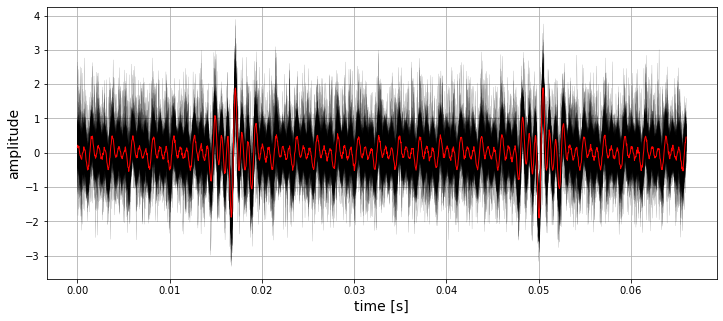

990
990


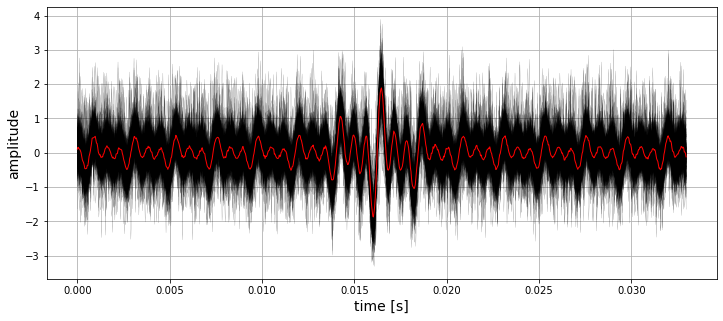

In [122]:
X_gear = Record1['X_gear'][0]
X_noise = Record1['X_noise'][0]
X_bearing = Record1['X_bearing'][0]
X_measured = X_gear + X_bearing + X_noise
ppr = int(Record1['PPR_input_shaft'][0][0]/1)
tacho = -2.5*Record1['Tacho_input_shaft'][0]
Tend = 10
t = np.arange(0, Tend, 1/30000)

# plt.plot(t,tacho)
# plt.plot(t,X_measured)
# plt.xlim(0,0.075)
# plt.show()

matA = synchronous(tacho,triglevel=2.5, data=X_measured, t=t, slope=-1,ppr=ppr)[0]
vecA = synchronous(tacho,triglevel=2.5, data=X_measured, t=t, slope=-1,ppr=ppr)[1]

plt.figure(figsize=(12,5))
for i in range(matA.shape[1]):
    plt.plot(t[:len(vecA)],matA[:,i], 'k', linewidth = 0.1)
plt.plot(t[:len(vecA)],vecA, 'r-', linewidth = 1,label='Time Averaged Signal')
#plt.title('Synchronous average for gear shaft')
plt.grid()
plt.xlabel('time [s]',size=14)
plt.ylabel('amplitude',size=14)
plt.savefig('sync_gear.png',dpi=300)
plt.show()

matA = synchronous(tacho,triglevel=2.5, data=X_measured, t=t, slope=-1,ppr=int(ppr/2))[0]
vecA = synchronous(tacho,triglevel=2.5, data=X_measured, t=t, slope=-1,ppr=int(ppr/2))[1]

plt.figure(figsize=(12,5))
for i in range(matA.shape[1]):
    plt.plot(t[:len(vecA)],matA[:,i], 'k', linewidth = 0.1)
plt.plot(t[:len(vecA)],vecA, 'r-', linewidth = 1,label='Time Averaged Signal')
#plt.title('Synchronous average for pinion shaft')
plt.grid()
plt.xlabel('time [s]',size=14)
plt.ylabel('amplitude',size=14)
plt.savefig('sync_pinion.png',dpi=300)
plt.show()



### d) Band-pass filtering 

In [100]:
def butter_bandpass(lowcut, highcut, fs, order,filter_type):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    if filter_type == 'band':
        b, a = signal.butter(order, [low, high], btype='band')
    if filter_type == 'low':
        b, a = signal.butter(order, low, btype='low')
    if filter_type == 'high':
        b, a = signal.butter(order, high, btype='high')
    return b, a

def butter_filter(data, lowcut, highcut, fs, order,filter_type):
    if filter_type == 'band':
        b, a = butter_bandpass(lowcut, highcut, fs, order,filter_type)
        y = signal.lfilter(b, a, data)
    if filter_type == 'low':
        b, a = butter_bandpass(lowcut, highcut, fs, order,filter_type)
        y = signal.lfilter(b, a, data)
    if filter_type == 'high':
        b, a = butter_bandpass(lowcut, highcut, fs, order,filter_type)
        y = signal.lfilter(b, a, data)
    return y

def nextpow2(x):
    res = np.ceil(np.log2(x))
    return res.astype('int')

X_gear = Record1['X_gear'][0]
X_noise = Record1['X_noise'][0]
X_bearing = Record1['X_bearing'][0]
X_measured = X_gear + X_bearing + X_noise 
fs = Record1['Fs'][0]
Tend = 10
t = np.arange(0, Tend, 1/30000)

     Filtered Time Series                                       Power Spectrum


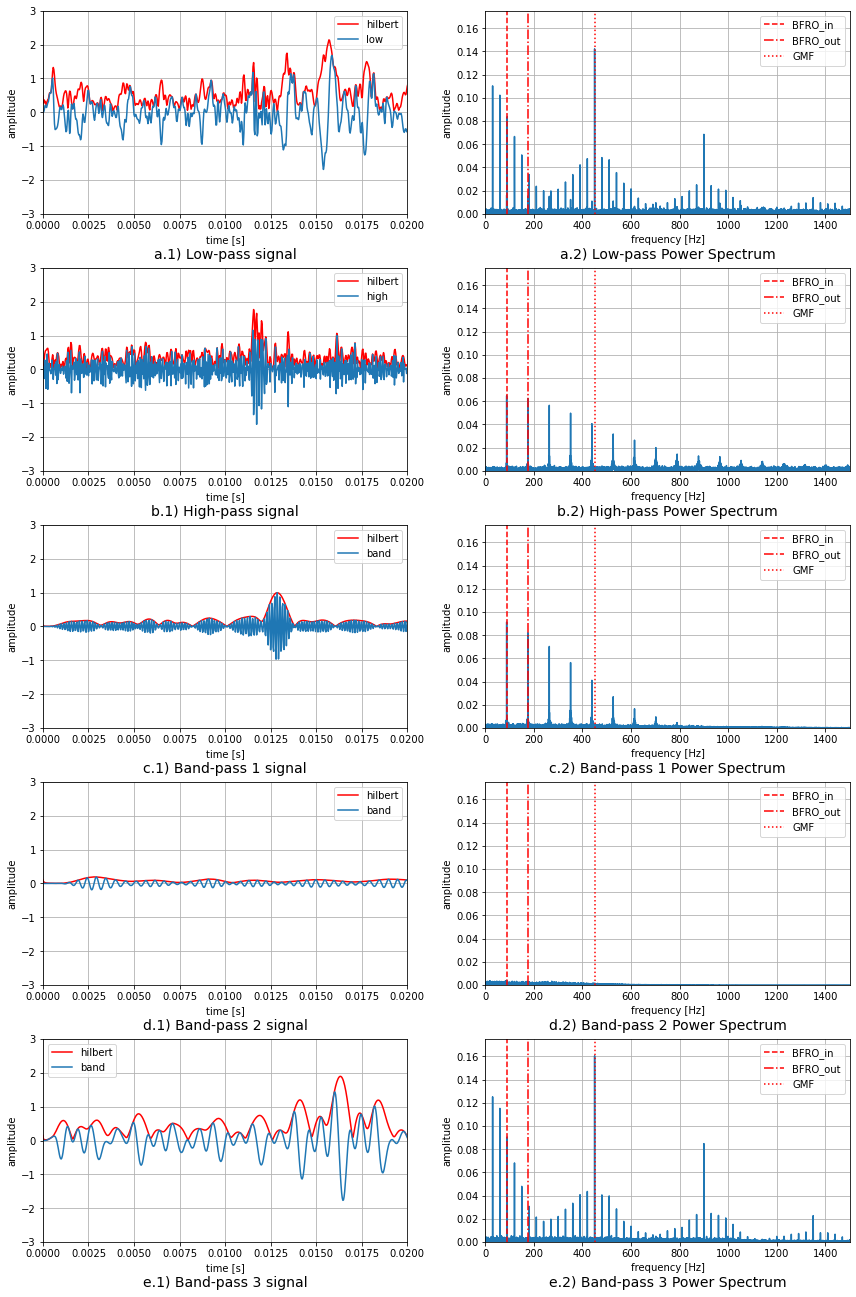

In [134]:
from scipy.signal import hilbert
from scipy import signal

Nfft = 2**nextpow2(len(X_measured))

filter_order = 5
low_freq = [6000, 0, 7000-1000/2, 2000-500/2, 1000-1400/2]
high_freq = [0, 6000, 7000+1000/2, 2000+500/2, 1000+1400/2]
filt_type = ['low','high','band','band','band']
labels1 = ['a.1) Low-pass signal','b.1) High-pass signal','c.1) Band-pass 1 signal',
           'd.1) Band-pass 2 signal','e.1) Band-pass 3 signal']
labels2 = ['a.2) Low-pass Power Spectrum','b.2) High-pass Power Spectrum','c.2) Band-pass 1 Power Spectrum',
           'd.2) Band-pass 2 Power Spectrum','e.2) Band-pass 3 Power Spectrum']
signals = [X_measured]

fig, axs = plt.subplots(5, 2,figsize=(12,18))
# Full wave rectification with Hilbert transform
# hilbert_signal = abs(hilbert(X_measured))
# axs[0,0].plot(t,hilbert_signal,label='hilbert',c='r')
# axs[0,0].plot(t,X_measured,label='unfiltered')
# axs[0,0].grid()
# axs[0,0].legend()
# axs[0,0].set_xlim(0,0.02)
# axs[0,0].set_ylim(-3,3)
# axs[0,0].set_xlabel('time [s]')
# axs[0,0].set_ylabel('amplitude') 
# axs[0,0].set_title('a.1) Unfiltered signal', y=-0.25,size=14)

# f, Pxx = signal.periodogram(abs(hilbert_signal), fs ,'flattop', scaling='spectrum', nfft = Nfft)
# A_rms = np.sqrt(Pxx)
# axs[0,1].plot(f, A_rms)
# axs[0,1].set_ylim(0,0.175)
# axs[0,1].set_xlabel('frequency [Hz]')
# axs[0,1].set_ylabel('amplitude')
# axs[0,1].grid()
# axs[0,1].set_xlim(0,1500)
# axs[0,1].set_title('a.2) Unfiltered Power Spectrum', y=-0.25,size=14)


for low,high,label,j,label1,label2 in zip(low_freq,high_freq,filt_type,np.arange(0,6),labels1,labels2):
    new_signal = butter_filter(X_measured, low, high, fs, filter_order, label)
    signals.append(new_signal)
    
    # Full wave rectification with Hilbert transform 
    hilbert_signal = abs(hilbert(new_signal))
    axs[j,0].plot(t,hilbert_signal,label='hilbert',c='r')
    axs[j,0].plot(t,new_signal,label=label)
    axs[j,0].grid()
    axs[j,0].legend()
    axs[j,0].set_xlim(0,0.02)
    axs[j,0].set_ylim(-3,3)
    axs[j,0].set_xlabel('time [s]')
    axs[j,0].set_ylabel('amplitude')
    axs[j,0].set_title(label1, y=-0.25,size=14)
    
    # Power spectrum
    f, Pxx = signal.periodogram(hilbert_signal, fs ,'flattop', scaling='spectrum', nfft = Nfft)
    A_rms = np.sqrt(Pxx)

    #xf,yf = fft(new_signal, fs)
    axs[j,1].plot(f, A_rms)
    axs[j,1].plot([BFRO1,BFRO1],[0,0.35],'r--',label = 'BFRO_in')
    axs[j,1].plot([BFRO2,BFRO2],[0,0.35],'r-.',label = 'BFRO_out')
    axs[j,1].plot([GMF1,GMF1],[0,0.35],'r:',label = 'GMF')
    axs[j,1].set_ylim(0,0.175)
    axs[j,1].set_xlabel('frequency [Hz]')
    axs[j,1].set_ylabel('amplitude')
    axs[j,1].grid()
    axs[j,1].set_title(label2, y=-0.25,size=14)
    axs[j,1].set_xlim(0,1500)
    axs[j,1].legend()
plt.tight_layout()
print('     Filtered Time Series                   ','                   Power Spectrum')
plt.savefig('filtering1.png',dpi=300)
plt.show()

### e) Kurtogram to determine bandpass filter parameters

In [139]:
import scipy.signal as Sig

def Fast_Kurtogram(x, nlevel, Fs, PLOT):
    """
    Computes the fast kurtogram of signal x up to level 'nlevel' via a fast decimated filterbank tree.
    Maximum number of decomposition levels is log2(length(x)), but it is 
    recommended to stay by a factor 1/8 below this.
    
    Parameters
    ----------
    x : TYPE numpy.ndarray
        1D time-series signal array.
    nlevel : int
        Number of levels to decompose the signal (see comment above).
    Fs : int
        sampling frequency of signal x.
    PLOT : TYPE
        1 to plot Fast Kurtogram or 0 to not plot.

    Returns
    -------
    Bandwidth parameters : list
        [Fc, Bw]
        Fc = centre frequency of interest (maximum feature value)
        Bw = the bandwidth around the centre frequency of interest
    
    --------------------------
    Reference: J. Antoni, Fast Computation of the Kurtogram for the Detection of Transient Faults, 
    Mechanical Systems and Signal Processing, Volume 21, Issue 1, 2007, pp.108-124.
    --------------------------
    Author: J. Antoni
    Last Revision: 12-2014
    --------------------------

    This is an edit version by WN Niehaus with a few small changes. 
    Converted to Python from WM Niehaus's version by RC Balshaw.
    
    Minor edit note: by capping the values of the plotted Kurtosis to (>= 0),
                     you may induce some errors if the kurtosis indicates a sub-Gaussian region (less than zero)
    """
    
    ########################################################################
    #CHECK INPUT VALUES
    ########################################################################
    N = len(x)
    N2 = np.log2(N) - 7
    
    if nlevel > N2:
        print('Please enter a smaller number of decomposition levels')
        raise SystemExit
        
    ########################################################################
    #FAST COMPUTATION OF THE KURTOGRAM (by means of wavelet packets or STFT)
    ########################################################################
    x = x - np.mean(x)
    #Analytic generating filters
    N = 16
    fc = 0.4
    #a short filter is just good enough!
    h = Sig.firwin(N + 1, fc) * np.exp(2 * 1j * np.pi * np.arange(N + 1) * 0.125)
    
    n_int = np.arange(2, N+2, dtype = int)
    n_float = np.arange(2, N+2, dtype = float)
    
    g = h[(1-n_int) % N] * (-1)**(1-n_float)
    
    N = int(np.fix((3/2*N))) #Rounds the value down
    #
    h1 = Sig.firwin(N + 1, 2/3 * fc) * np.exp(2 * 1j * np.pi * np.arange(N + 1) * 0.25/3)
    h2 = h1 * np.exp(2 * 1j * np.pi * np.arange(N + 1)/6)
    h3 = h1 * np.exp(2 * 1j * np.pi * np.arange(N + 1)/3)
    #
    Kwav = K_wpQ(x, h, g, h1, h2, h3, nlevel)		# kurtosis of the complex envelope
    
    #Kwav = Kwav * (1 * (Kwav >= 0))							# keep positive values only! (Be careful, this can cause problems)
    ########################################################################
    #GRAPHICAL DISPLAY OF RESULTS
    ########################################################################
    Level_w = np.arange(1, nlevel + 1, 1)
    Level_w = np.array([Level_w, Level_w + np.log2(3) - 1])
    Level_w = np.sort(Level_w.ravel())
    Level_w = np.append(0,Level_w[0:2*nlevel - 1])
    
    Freq_w = Fs * ((np.arange(0, 3*2**(nlevel))/(3*2**(nlevel + 1))) + 1/(3*2**(2+nlevel)))
    
    I, J, M = max_IJ(Kwav)  
    
    fi = (J)/3 / 2**(nlevel + 1)
    fi += 2**(-2 - Level_w[I])
    
    Bw = Fs * 2**(-1*(Level_w[I] + 1))
    Fc = Fs * fi

    if PLOT == 1:
        plt.figure(figsize=(8,5))
        plt.imshow(Kwav,aspect='auto', interpolation = 'none')#, extent=(Freq_w[0], Freq_w[-1], Level_w[-1], Level_w[0]))
        plt.colorbar()
        plt.xlabel("Frequency (Hz)")
        plt.yticks(np.arange(0, 2*nlevel, 1), np.round(Level_w*10)/10)
        
        Freqs = np.arange(0, int(Fs/2) + Fs/(20), Fs/(20), dtype = int)
        RangeX = np.linspace(0, len(Freq_w), len(Freqs), dtype = int)
  
        plt.xticks(RangeX, np.round(Freqs, 3))
        print(Fc, Bw)
        plt.title(r"Fast Kurtogram - $K_{}$ = {:.1f}, @ level {}, Bw = {:.2f}Hz, $f_c$ = {:.2f}Hz".format("{max}", M, np.fix(10*Level_w[I])/10, Bw, Fc))
        plt.tight_layout()
        plt.savefig('kurt_COT.png',dpi=300)
        plt.show()
    
    return [Fc, Bw]

2
6875.000000000001 1250.0000000000002


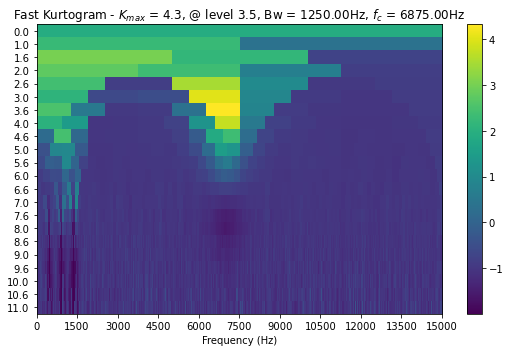

Centered Frequency: 6875.0 Bandwidth: 1250.0


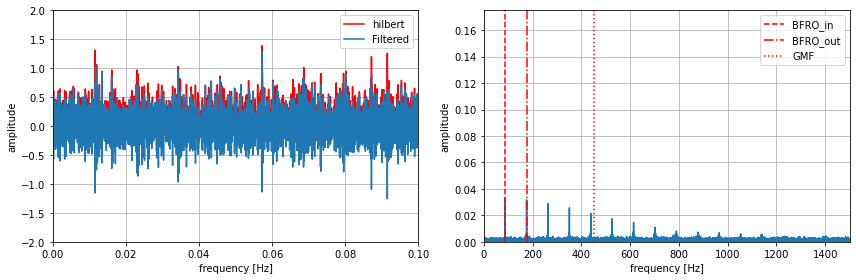

In [136]:
import math
X_gear = Record1['X_gear'][0]
X_noise = Record1['X_noise'][0]
X_bearing = Record1['X_bearing'][0]
X_measured = X_gear + X_bearing + X_noise 
fs = Record2['Fs'][0]
Tend = 10
t = np.arange(0, Tend, 1/30000)

nlevel  = int(math.log2(len(X_measured))*1/8)
print(nlevel)

fc,bw = Fast_Kurtogram(X_measured, 11, fs[0], 1)
print('Centered Frequency:',round(fc,1),'Bandwidth:',round(bw,1))
x_filtered = butter_filter(X_measured, fc-bw/2, fc+bw/2, fs, filter_order, 'high')
hilbert_signal = abs(hilbert(x_filtered))

fig, axs = plt.subplots(1, 2,figsize=(12,4))
axs[0].plot(t,hilbert_signal,label='hilbert',c='r')
#axs[0].set_title('Bandpass Filtered Signal Using Kurtogram')
#axs[0].plot(Time, X_measured, label='Unfiltered')
axs[0].plot(t, x_filtered, label='Filtered')
axs[0].set_xlabel('frequency [Hz]')
axs[0].set_ylabel('amplitude')
axs[0].set_xlim(0,0.1)
axs[0].set_ylim(-2,2)
axs[0].legend()
axs[0].grid()

f, Pxx = signal.periodogram(hilbert_signal, fs ,'flattop', scaling='spectrum', nfft = Nfft)
A_rms = np.sqrt(Pxx)

#xf,yf = fft(new_signal, fs)
axs[1].plot(f, A_rms)
axs[1].set_ylim(0,0.175)
axs[1].set_xlabel('frequency [Hz]')
axs[1].set_ylabel('amplitude')
axs[1].plot([BFRO1,BFRO1],[0,0.35],'r--',label = 'BFRO_in')
axs[1].plot([BFRO2,BFRO2],[0,0.35],'r-.',label = 'BFRO_out')
axs[1].plot([GMF1,GMF1],[0,0.35],'r:',label = 'GMF')
axs[1].grid()
axs[1].set_xlim(0,1500)
axs[1].legend()
plt.tight_layout()
plt.savefig('kurt_filter1.png',dpi=300)

2
1733.3984375 9.765625000000002


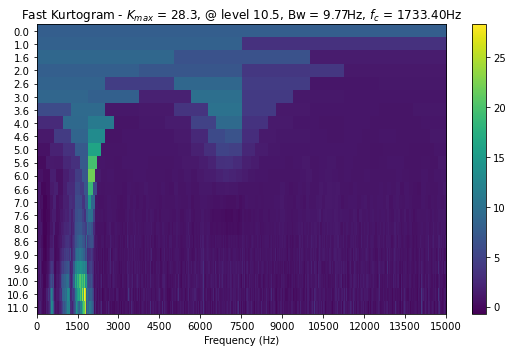

Centered Frequency: 1733.4 Bandwidth: 9.8


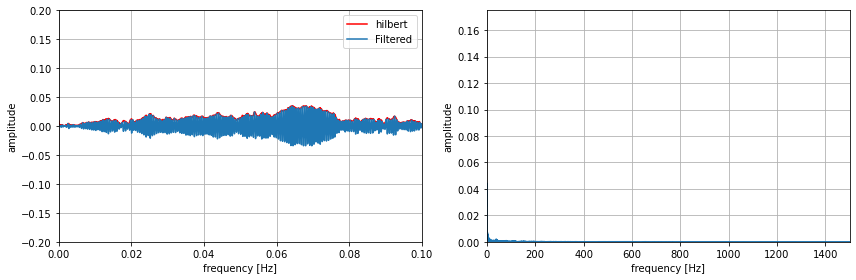

In [138]:
import math
from scipy import signal

X_gear = Record2['X_gear'][0]
X_noise = Record2['X_noise'][0]
X_bearing = Record2['X_bearing'][0]
X_measured = X_gear + X_bearing + X_noise 
fs = Record2['Fs'][0]
Tend = 10
t = np.arange(0, Tend, 1/30000)

nlevel  = int(math.log2(len(X_measured))*1/8)
print(nlevel)

fc,bw = Fast_Kurtogram(X_measured, 11, fs[0], 1)
print('Centered Frequency:',round(fc,1),'Bandwidth:',round(bw,1))
x_filtered = butter_filter(X_measured, fc-bw/2, fc+bw/2, fs, 1, 'band')
hilbert_signal = abs(hilbert(x_filtered))

fig, axs = plt.subplots(1, 2,figsize=(12,4))
axs[0].plot(t,hilbert_signal,label='hilbert',c='r')
#axs[0].set_title('Bandpass Filtered Signal Using Kurtogram')
#axs[0].plot(Time, X_measured, label='Unfiltered')
axs[0].plot(t, x_filtered, label='Filtered')
axs[0].set_xlabel('frequency [Hz]')
axs[0].set_ylabel('amplitude')
axs[0].set_xlim(0,0.1)
axs[0].set_ylim(-0.2,0.2)
axs[0].legend()
axs[0].grid()

f, Pxx = signal.periodogram(hilbert_signal, fs ,'flattop', scaling='spectrum', nfft = Nfft)
A_rms = np.sqrt(Pxx)

#xf,yf = fft(new_signal, fs)
axs[1].plot(f, A_rms)
axs[1].set_ylim(0,0.175)
axs[1].set_xlabel('frequency [Hz]')
axs[1].set_ylabel('amplitude')
axs[1].grid()
axs[1].set_xlim(0,1500)
plt.tight_layout()
plt.savefig('kurt_filter2.png',dpi=300)

### f) Computed Order Tracking 

In [176]:
def COT(tacho, time, signal, Fs, triglevel, ppr, sampperrev):
    ts = np.sign(tacho - triglevel)
    dts = np.diff(ts)
    tt = np.arange(0, (len(dts))/(Fs), 1/Fs)
    remarr = np.arange(0, len(tt), ppr)
    tts = tt[remarr]
    dtarr = tt[np.where(dts<0)[0]]
    nsamples = len(dtarr)
    timemat = np.zeros((nsamples-1, sampperrev))

    ivals = np.arange(nsamples-1)
    for i in ivals:
        timemat[i] = np.linspace(dtarr[i], dtarr[i+1], sampperrev)
        
    new_t = timemat.flatten()
    inter_f = interp1d(time, signal, axis=0, fill_value="extrapolate")
    new_sig = inter_f(new_t)

    return new_t, new_sig

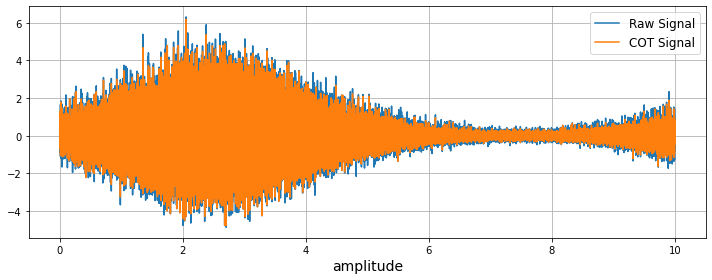

In [209]:
X_gear = Record2['X_gear'][0]
X_noise = Record2['X_noise'][0]
X_bearing = Record2['X_bearing'][0]
X_measured = X_gear + X_bearing + X_noise 
fs = Record2['Fs'][0]
ppr = Record2['PPR_input_shaft'][0][0]
tacho = Record2['Tacho_input_shaft'][0]
Tend = 10
t = np.arange(0, Tend, 1/30000)

plt.figure(figsize=(10,4))
#plt.title('Comparison between COT and Raw signal', fontsize=22, y=1.05)
plt.plot(t, X_measured, label = 'Raw Signal')
tacho = Record2['Tacho_input_shaft'][0]
#plt.plot(tacho);plt.show()
t1, x_cot = COT(tacho, t, X_measured, fs[0], -0.5, ppr, 100) # you can play around with the 100

plt.plot(t1, x_cot, label = 'COT Signal')
plt.xlabel('time [s]', fontsize=14)
plt.xlabel('amplitude', fontsize=14)
plt.legend(fontsize=12, loc='best')
plt.grid()
plt.tight_layout()
plt.savefig('COT.png',dpi=300)
plt.show()

2
1484.375 156.25000000000003


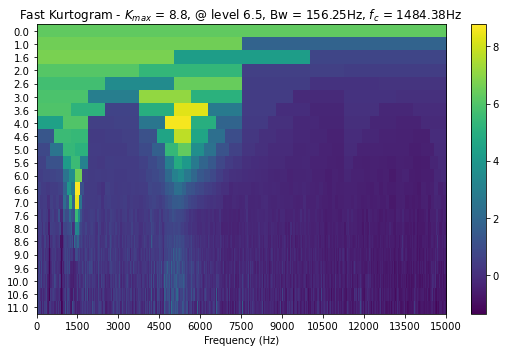

Centered Frequency: 1484.4 Bandwidth: 156.3


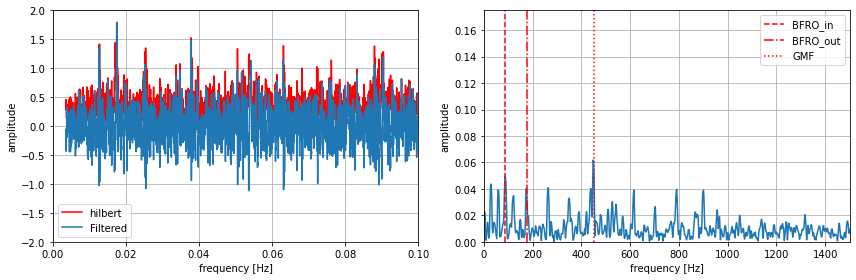

In [210]:
import math

nlevel  = int(math.log2(len(x_cot))*1/8)
print(nlevel)

fc,bw = Fast_Kurtogram(x_cot, 11, fs[0], 1)
print('Centered Frequency:',round(fc,1),'Bandwidth:',round(bw,1))
epsilon = 1e-6
high_point = fc+bw/2 + epsilon
low_point = fc-bw/2 + epsilon

x_filtered = butter_filter(x_cot, low_point,high_point , fs, 4, 'band')
hilbert_signal = abs(hilbert(x_cot))

fig, axs = plt.subplots(1, 2,figsize=(12,4))
axs[0].plot(t1,hilbert_signal,label='hilbert',c='r')
#axs[0].set_title('Bandpass Filtered Signal Using Kurtogram')
#axs[0].plot(Time, X_measured, label='Unfiltered')
axs[0].plot(t1, x_cot, label='Filtered')
axs[0].set_xlabel('frequency [Hz]')
axs[0].set_ylabel('amplitude')
axs[0].set_xlim(0,0.1)
axs[0].set_ylim(-2,2)
axs[0].legend()
axs[0].grid()

f, Pxx = signal.periodogram(hilbert_signal, fs ,'flattop', scaling='spectrum', nfft = Nfft)
A_rms = np.sqrt(Pxx)

#xf,yf = fft(new_signal, fs)
axs[1].plot(f, A_rms)
axs[1].set_ylim(0,0.175)
axs[1].set_xlabel('frequency [Hz]')
axs[1].set_ylabel('amplitude')
axs[1].grid()
axs[1].set_xlim(0,1500)
axs[1].plot([BFRO1,BFRO1],[0,0.35],'r--',label = 'BFRO_in')
axs[1].plot([BFRO2,BFRO2],[0,0.35],'r-.',label = 'BFRO_out')
axs[1].plot([GMF1,GMF1],[0,0.35],'r:',label = 'GMF')
axs[1].legend()
plt.tight_layout()
plt.savefig('kurt_filter_COT.png',dpi=300)